# Problema:  Prever se um cliente vai cancelar sua assinatura

# Estrutura das variáveis


*   **Estado:** O estado de onde o cliente é originário
*   **Tempo de conta:** Número de dias que o cliente está usando os serviços
*   **Código de área:** A área de onde o cliente é originário
*   **Número de telefone:** O número de telefone do cliente
*   **Plano internacional:** O status do plano internacional do cliente
*   **Plano de correio de voz:** O status do plano de correio de voz do cliente
*   **Número de mensagens de correio de voz:** Número de mensagens de correio de voz enviadas pelo cliente
*   **Total de minutos diurnos:** Total de minutos de chamadas feitos por um cliente durante o dia
*   **Total de chamadas diurnas:** Número total de chamadas feitas por um cliente durante o dia
*   **Total de cobranças diurnas:** Valor total cobrado a um cliente **durante** o dia
*   **Total de minutos vespertinos:** Total de minutos de chamadas feitos por um cliente durante a tarde
*   **Total de chamadas vespertinas:** Número total de chamadas feitas por um cliente durante a tarde
*   **Total de cobranças vespertinas:** Valor total cobrado a um cliente durante a tarde
*   **Total de minutos noturnos:** Total de minutos de chamadas feitos por um cliente durante a noite
*   **Total de chamadas noturnas:** Número total de chamadas feitas por um cliente durante a noite
*   **Total de cobranças noturnas:** Valor total cobrado a um cliente durante a noite
*   **Total de minutos internacionais:** Total de minutos de chamadas internacionais feitas por um cliente
*   **Total de chamadas internacionais:** Número total de chamadas internacionais feitas por um cliente
*   **Total de cobranças internacionais:** Valor total cobrado por chamadas internacionais feitas por um cliente
*   **Chamadas ao serviço de atendimento ao cliente:** Número total de chamadas feitas ao serviço de atendimento ao cliente
*   **Cancelamento:** Cancelado ou não

https://github.com/kuldeep1909/Sony-Research-Machine-Learning-Project

In [1]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn
#!pip install scikit-learn
#!pip install jupyter
#!pip install shap
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 13.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchmetrics
from torch.utils.data import TensorDataset, DataLoader

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [3]:
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")

y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")

In [4]:
X_train.shape

(2666, 15)

In [5]:
model =LogisticRegression(max_iter=1000, verbose=0)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [6]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [7]:
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

In [8]:
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

In [9]:
print("Acurácia no conjunto de treino:", accuracy_train)
print("Precisão no conjunto de treino:", precision_train)
print("Recall no conjunto de treino:", recall_train)
print("F1-score no conjunto de treino:", f1_train)

print("\nAcurácia no conjunto de teste:", accuracy_test)
print("Precisão no conjunto de teste:", precision_test)
print("Recall no conjunto de teste:", recall_test)
print("F1-score no conjunto de teste:", f1_test)

Acurácia no conjunto de treino: 0.8657164291072769
Precisão no conjunto de treino: 0.6555555555555556
Recall no conjunto de treino: 0.15284974093264247
F1-score no conjunto de treino: 0.24789915966386555

Acurácia no conjunto de teste: 0.8875562218890555
Precisão no conjunto de teste: 0.84375
Recall no conjunto de teste: 0.27835051546391754
F1-score no conjunto de teste: 0.4186046511627907


In [10]:
X_train.values

array([[ 0.09433962,  0.        ,  1.        , ...,  0.15254237,
         0.14820359,  0.04501263],
       [-0.13207547,  0.        ,  0.        , ...,  0.16071429,
         0.13609467,  0.04498945],
       [-0.56603774,  0.        ,  1.        , ...,  0.12244898,
         0.14678899,  0.045     ],
       ...,
       [ 0.0754717 ,  0.        ,  0.        , ...,  0.06896552,
         0.14820359,  0.04500899],
       [-0.58490566,  0.        ,  0.        , ...,  0.18518519,
         0.13609467,  0.04498012],
       [-0.39622642,  0.        ,  0.        , ...,  0.06666667,
         0.13609467,  0.04498229]])

In [11]:
# Converter X e y para torch.Tensor
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)

In [12]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, num_labels):
        super(NeuralNetwork, self).__init__()
        self.linear1 = nn.Linear(input_dim, 100)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.1)
        self.linear2 = nn.Linear(100, num_labels)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.linear2(x)
        x = self.sigmoid(x)
        return x

In [13]:
model = NeuralNetwork(15,1)

In [14]:
n_epochs = 5000
learning_rate = 0.0001

In [15]:
#Para saídas binárias com sigmoide
criterion = nn.BCELoss()

#Combina a sigmoide e a BCELoss
#criterion = nn.BCEWithLogitsLoss()

#Usado quando a saída é categórica (multiclasse), mas pode ser adaptada para classificação binária
#se as saídas forem representadas de forma categórica (com dois neurônios de saída).
#Não requer uma função sigmoide, pois aplica log_softmax internamente.
#criterion = nn.CrossEntropyLoss()

In [16]:
#Método básico de otimização
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#Uma variante do Adam, mas com decaimento de peso "correto" (weight decay)
#optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=0.01)

#Uma variação de SGD com uma taxa de aprendizado adaptativa
#optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

In [17]:
for epoch in range(n_epochs):
    model.train()

    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Época [{epoch+1}/100], Loss: {loss.item():.4f}')

Época [100/100], Loss: 0.5481
Época [200/100], Loss: 0.4845
Época [300/100], Loss: 0.4407
Época [400/100], Loss: 0.4156
Época [500/100], Loss: 0.3992
Época [600/100], Loss: 0.3895
Época [700/100], Loss: 0.3805
Época [800/100], Loss: 0.3748
Época [900/100], Loss: 0.3686
Época [1000/100], Loss: 0.3634
Época [1100/100], Loss: 0.3593
Época [1200/100], Loss: 0.3534
Época [1300/100], Loss: 0.3497
Época [1400/100], Loss: 0.3452
Época [1500/100], Loss: 0.3410
Época [1600/100], Loss: 0.3358
Época [1700/100], Loss: 0.3337
Época [1800/100], Loss: 0.3282
Época [1900/100], Loss: 0.3253
Época [2000/100], Loss: 0.3191
Época [2100/100], Loss: 0.3166
Época [2200/100], Loss: 0.3109
Época [2300/100], Loss: 0.3078
Época [2400/100], Loss: 0.3043
Época [2500/100], Loss: 0.2971
Época [2600/100], Loss: 0.2961
Época [2700/100], Loss: 0.2906
Época [2800/100], Loss: 0.2876
Época [2900/100], Loss: 0.2832
Época [3000/100], Loss: 0.2803
Época [3100/100], Loss: 0.2771
Época [3200/100], Loss: 0.2749
Época [3300/100],

#### model.eval()

Coloca o modelo em modo de avaliação. No modo de avaliação, a modelagem **desativa camadas como dropout e batch normalization**, que se comportam de maneira diferente durante o treinamento e a inferência. Além disso, neste modo, o **cálculo dos gradientes é desabilitado**, o que melhora a eficiência e evita a atualização acidental dos parâmetros.

In [18]:
model.eval()

NeuralNetwork(
  (linear1): Linear(in_features=15, out_features=100, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (linear2): Linear(in_features=100, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [19]:
# Definindo o objeto para calcular a acurácia para uma tarefa binária
accuracy = torchmetrics.Accuracy(task="binary")
precision = torchmetrics.Precision(task="binary")
recall = torchmetrics.Recall(task="binary")
f1 = torchmetrics.F1Score(task="binary")

In [49]:
# Predições no conjunto de treino
train_pred = model(X_train_tensor)
train_pred = (train_pred >= 0.5).int() # Converte probabilidades para 0 ou 1 tem uma sigmoid na última camada

# Calcular a acurácia no conjunto de treino
train_accuracy = accuracy(train_pred, y_train_tensor.int())
train_precision = precision(train_pred, y_train_tensor.int())
train_recall = recall(train_pred, y_train_tensor.int())
train_f1 = f1(train_pred, y_train_tensor.int())

In [50]:
# Predições no conjunto de teste
test_pred = model(X_test_tensor)
test_pred = (test_pred >= 0.5).int() # Converte probabilidades para 0 ou 1 tem uma sigmoid na última camada

# Calcular a acurácia no conjunto de teste
test_accuracy = accuracy(test_pred, y_test_tensor.int())
test_precision = precision(test_pred, y_test_tensor.int())
test_recall = recall(test_pred, y_test_tensor.int())
test_f1 = f1(test_pred, y_test_tensor.int())

In [51]:
print("Acurácia no conjunto de treino:", train_accuracy.item())
print("Precisão no conjunto de treino:", train_precision.item())
print("Recall no conjunto de treino:", train_recall.item())
print("F1-score no conjunto de treino:", train_f1.item())

print("\nAcurácia no conjunto de teste:", test_accuracy.item())
print("Precisão no conjunto de teste:", test_precision.item())
print("Recall no conjunto de teste:", test_recall.item())
print("F1-score no conjunto de teste:", test_f1.item())

Acurácia no conjunto de treino: 0.9276068806648254
Precisão no conjunto de treino: 0.9141631126403809
Recall no conjunto de treino: 0.5518134832382202
F1-score no conjunto de treino: 0.6882067918777466

Acurácia no conjunto de teste: 0.908545732498169
Precisão no conjunto de teste: 0.8461538553237915
Recall no conjunto de teste: 0.4536082446575165
F1-score no conjunto de teste: 0.5906040072441101


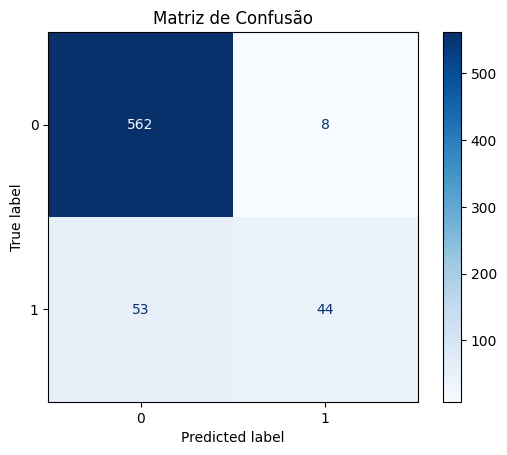

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_tensor.int().numpy(), test_pred.numpy())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()